<a href="https://colab.research.google.com/github/Blackaiza/Google-Collab/blob/main/Mudah_my_Scrape_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium beautifulsoup4 pandas

In [ ]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 2s (58.9 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!apt install -y chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [ ]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
#code baru
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import os
import re

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=options)

# URLs to scrape
urls = [

    "https://www.mudah.my/2025-new-perodua-alza-1-5-x-a-helmi-sa-terengganu-109852590.htm", #1
    "https://www.mudah.my/2024-new-toyota-hiace-3-0-l-m-jenazah-105758238.htm", #2
    "https://www.mudah.my/2025-new-perodua-ativa-x-a-helmi-sa-terengganu-109852358.htm", #3
    "https://www.mudah.my/2015-toyota-alphard-2-5-sc-pilot-seat-sunroof-360-109282740.htm",#4
    "https://www.mudah.my/2025-new-perodua-axia-g-a-helmi-sa-terengganu-109850937.htm", #5
    "https://www.mudah.my/proton-x70-1-8-premium-full-service-record-2019-107690476.htm", #6
    "https://www.mudah.my/2020-toyota-vios-1-5-e-a-perak-tiptop-109943180.htm", #7
    "https://www.mudah.my/2016-toyota-sienta-1-5-v-a-perak-tiptop-109943312.htm", #8
    "https://www.mudah.my/2020-toyota-vios-1-5-g-a-perak-fsr-tiptop-109938339.htm", #9
    "https://www.mudah.my/2012-toyota-vellfire-2-4-zp-facelift-a-p-boot-108844251.htm", #10
    "https://www.mudah.my/2019-nissan-serena-premium-2-0l-a-special-offer-108101520.htm", #11
    "https://www.mudah.my/2015-honda-jazz-1-5-v-e-hi-spec-keyless-109396519.htm", #12
    "https://www.mudah.my/2015-toyota-vios-1-5-trd-sportivo-a-perak-tiptop-109910145.htm", #13
    "https://www.mudah.my/2024-new-toyota-hiace-3-0-l-m-jenazah-105758238.htm", #14
    "https://www.mudah.my/2024-new-proton-persona-1-6-a-close-down-sales-99140974.htm", #15
    "https://www.mudah.my/2024-new-toyota-hiace-3-0-m-panel-van-best-offer-92217650.htm", #16
    "https://www.mudah.my/2024-new-toyota-hiace-3-0-m-bus-pekerja-10-11-seat-104476408.htm", #17
    "https://www.mudah.my/2014-perodua-alza-1-5-zhv-advanced-a-109334097.htm", #18
    "https://www.mudah.my/2017-bmw-x5-2-0-xdrive40e-m-sport-ckd-a-108446823.htm", #19
    "https://www.mudah.my/2011-mercedes-benz-slk200-k-sports-cbu-1-8-109579718.htm", #20
    "https://www.mudah.my/2011-mercedes-benz-slk200-sports-cbu-1-8-109247340.htm", #21
    "https://www.mudah.my/2023-proton-saga-1-3-premium-s-at-my19-facelift-107914931.htm", #22
    "https://www.mudah.my/2021-perodua-myvi-1-5-av-a-fsr-perak-tiptop-108945484.htm", #23
    "https://www.mudah.my/2009-proton-saga-1-3-m-line-a-109327651.htm",#24
    "https://www.mudah.my/2009-hyundai-grand-starex-2-5-crdi-vgt-a-109042096.htm",#25
    "https://www.mudah.my/2020-proton-exora-executive-1-6l-a-full-loan-109125140.htm",#26
    "https://www.mudah.my/mercedes-amg-a45s-2021-imported-new-109376473.htm",#27
    "https://www.mudah.my/2023-perodua-myvi-1-5-av-facelift-a-perak-tiptop-109389734.htm",#28
    "https://www.mudah.my/2013-bmw-528i-2-0-m-sport-a-109766227.htm",#29
    "https://www.mudah.my/2016-honda-hr-v-1-8-v-mugen-a-1-owner-perak-plat-108615502.htm",#30
    "https://www.mudah.my/2025-toyota-yaris-1-5-e-fl-cny-n-raya-car-103735763.htm",#31
    "https://www.mudah.my/1995-nissan-vanette-1-5-m-109766107.htm",#32
    "https://www.mudah.my/2025-toyota-vios-1-5-e-my23-a-103735794.htm",#33
    "https://www.mudah.my/2019-proton-x70-1-8-executive-2wd-a-109766208.htm",#34
    "https://www.mudah.my/2023-perodua-bezza-1-3-av-a-perak-premium-109813707.htm",#35
    "https://www.mudah.my/2020-bmw-330e-2-0l-a-109765724.htm",#36
    "https://www.mudah.my/2023-toyota-hilux-2-8-rogue-a-109766177.htm",#37
    "https://www.mudah.my/2020-perodua-bezza-1-3-a-prem-x-fl-at-sedan-108200232.htm",#38
    "https://www.mudah.my/2009-toyota-corolla-altis-1-8-g-a-perak-tiptop-108805774.htm",#39
    "https://www.mudah.my/2018-toyota-hilux-2-4-g-facelift-m-perak-tiptop-107429162.htm",#40

    "https://www.mudah.my/2015-volkswagen-golf-2-0-r-mk7r-local-stage3-440hp-109699679.htm", #41 Hasif
    "https://www.mudah.my/mercedes-benz-a180-amg-full-convert-a45-3wrty-2016-109905742.htm", #42 Hasif
    "https://www.mudah.my/2023-toyota-alphard-2-5-z-a-109340339.htm", #43 Hasif
    "https://www.mudah.my/2023-land-rover-defender-5-0-110-p525-carpathian-109272583.htm", #44 Hasif
    "https://www.mudah.my/2020-audi-tt-2-0-tfsi-s-line-a-109313353.htm", #45 Hasif
    "https://www.mudah.my/bmw-330e-2-0-convert-m3-high-specs-3wrty-2019-109392549.htm", #46 Hasif
    "https://www.mudah.my/mercedes-benz-cla200-1-6-amg-convert-cla45-3wrty-109606874.htm", #47 Hasif
    "https://www.mudah.my/2019-honda-city-1-5-hybrid-a-7-day-gurante-drive-108728292.htm", #48 Hasif
    "https://www.mudah.my/2019-honda-stepwagon-1-5-spada-7-seater-a-108740657.htm", #49 Hasif
    "https://www.mudah.my/2020-toyota-harrier-2-0-z-modelista-a-jbl-hud-109561509.htm", #50 Hasif
    "https://www.mudah.my/2009-proton-persona-1-6-m-100389997.htm", #51 Hasif
    "https://www.mudah.my/2014-proton-persona-1-6-sv-a-blacklist-can-loan-109951052.htm", #52 Hasif
    "https://www.mudah.my/2020-perodua-axia-1-0-gxtra-a-108457691.htm", #53 Hasif
    "https://www.mudah.my/2020-honda-stepwagon-1-5-spada-a-109950842.htm", #54 Hasif
    "https://www.mudah.my/2015-honda-city-1-5-s-a-109950863.htm", #55 Hasif
    "https://www.mudah.my/2004-honda-accord-2-0-vti-a-109950669.htm", #56 Hasif
    "https://www.mudah.my/2021-proton-x50-premium-1-5l-a-109950735.htm", #57 Hasif
    "https://www.mudah.my/1995-honda-civic-1-5-e-eg8-m-109950637.htm", #58 Hasif
    "https://www.mudah.my/2020-proton-x50-1-5-tgdi-flagship-a-109322766.htm", #59 Hasif
    "https://www.mudah.my/2020-honda-civic-1-5-hatchback-fk7-a-109928947.htm", #60 Hasif
    "https://www.mudah.my/2022-proton-x50-executive-1-5l-a-109768037.htm", #61 Hasif
    "https://www.mudah.my/2022-perodua-myvi-1-5-h-a-109948904.htm", #62 Hasif
    "https://www.mudah.my/2013-honda-cr-v-2-0a-i-vtec-109913976.htm", #63 Hasif
    "https://www.mudah.my/2023-toyota-vellfire-2-4-z-premier-a-109421199.htm", #64 Hasif
    "https://www.mudah.my/car-king-honda-accord-tc-p-fspec-18-oz-rim-newtyre-107194154.htm", #65 Hasif

    "https://www.mudah.my/2020-perodua-alza-1-5-se-a-109543046.htm",#66 Syazwan
    "https://www.mudah.my/2007-mercedes-benz-e250-cbu-2-5-a-109736870.htm",#67 Syazwan
    "https://www.mudah.my/2014-perodua-viva-1-0-a-109903068.htm",#68 Syazwan
    "https://www.mudah.my/2011-proton-inspira-2-0-premium-a-109950948.htm",#69 Syazwan
    "https://www.mudah.my/2012-bmw-x3-2-0-xdrive20i-cbu-a-109950645.htm",#70 Syazwan
    "https://www.mudah.my/2016-bmw-318i-luxury-facelift-no-processing-fee-109950517.htm",#71 Syazwan
    "https://www.mudah.my/2017-perodua-myvi-1-5-h-a-109700863.htm",#72 Syazwan
    "https://www.mudah.my/2018-proton-x70-1-8-premium-2wd-a-108869630.htm",#73 Syazwan
    "https://www.mudah.my/2021-perodua-ativa-1-0-h-a-109666151.htm",#74 Syazwan
    "https://www.mudah.my/2019-toyota-vellfire-2-5-zg-a-2021-109515488.htm",#75 Syazwan
    "https://www.mudah.my/2019-toyota-fortuner-2-4-srz-4x4-a-no-offroad-jg-109949733.htm",#76 Syazwan
    "https://www.mudah.my/2006-naza-citra-2-0-gls-a-109949161.htm",#77 Syazwan
    "https://www.mudah.my/2013-perodua-viva-1-0-elite-ezi-a-109948910.htm",#78 Syazwan
    "https://www.mudah.my/2009-proton-saga-1-3-m-line-a-109948559.htm",#79 Syazwan
    "https://www.mudah.my/kia-sorento-2-4-high-spec-a-2017-107507723.htm",#80 Syazwan
    "https://www.mudah.my/new-perodua-axia-fast-stock-mudah-lulus-109888336.htm",#81 Syazwan
    "https://www.mudah.my/2021-mercedes-benz-e300-coupe-amg-line-2-0l-a-109921850.htm",#82 Syazwan
    "https://www.mudah.my/2015-honda-city-1-5-v-a-109951299.htm",#83 Syazwan
    "https://www.mudah.my/2014-perodua-alza-1-5-ez-standard-facelift-a-109950929.htm",#84 Syazwan
    "https://www.mudah.my/2009-perodua-myvi-1-3-ezi-facelift-a-109950854.htm",#85 Syazwan
    "https://www.mudah.my/ori-2016-honda-cr-v-2-0-4wd-a-accident-free-car-109950297.htm",#86 Syazwan
    "https://www.mudah.my/2008-bmw-e92-320i-coupe-rhd-2-0-a-107968871.htm",#87 Syazwan
    "https://www.mudah.my/origin-paint-2017-bmw-x1-a-perfect-cond-like-new-109560321.htm",#88 Syazwan
    "https://www.mudah.my/honda-civic-1-5-tc-premium-a-ori-2017-honda-serv-108281490.htm",#89 Syazwan
    "https://www.mudah.my/2010-volkswagen-eos-2-0-t-fsi-a-109947878.htm",#90 Syazwan

    "https://www.mudah.my/2012-perodua-myvi-1-5-se-auto-rendah-muka-109951544.htm", #91 Mejad
    "https://www.mudah.my/2017-honda-civic-1-5-tc-premium-a-106691268.htm", #92 Mejad
    "https://www.mudah.my/2009-toyota-altis-1-8-auto-loan-kedai-109951589.htm", #93 Mejad
    "https://www.mudah.my/2014-mitsubishi-triton-2-5-auto-109951501.htm", #94 Mejad
    "https://www.mudah.my/2012-toyota-innova-2-0-auto-rendah-muka-109951566.htm", #95 Mejad
    "https://www.mudah.my/2016-proton-saga-1-3-plus-a-109951556.htm", #96 Mejad
    "https://www.mudah.my/2016-mercedes-benz-cla200-cbu-1-6-amg-line-a-108688467.htm", #97 Mejad
    "https://www.mudah.my/2018-mercedes-benz-glc250-ckd-a-109264202.htm", #98 Mejad
    "https://www.mudah.my/2016-porsche-macan-2-0-a-108255332.htm", #99 Mejad
    "https://www.mudah.my/2013-bmw-528i-2-0-m-sports-facelift-a-108586723.htm", #100 Mejad
    "https://www.mudah.my/2019-ford-mustang-5-0-gt-a-recaro-edition-107106851.htm", #101 Mejad
    "https://www.mudah.my/2017-mercedes-benz-gla250-amg-2-0-a-108797422.htm", #102 Mejad
    "https://www.mudah.my/2020-bmw-330i-a-107971458.htm", #103 Mejad
    "https://www.mudah.my/2019-mercedes-benz-cla200d-hud-p-roof-107197569.htm", #104 Mejad
    "https://www.mudah.my/2013-peugeot-208-1-6-vti-allure-a-109387461.htm", #105 Mejad
    "https://www.mudah.my/2003-toyota-camroad-2-0-a-motorhome-107533552.htm", #106 Mejad
    "https://www.mudah.my/2023-toyota-landcruiser-3-5-ax-a-109950705.htm", #107 Mejad
    "https://www.mudah.my/2009-proton-exora-1-6-h-line-cps-a-109949725.htm", #108 Mejad
    "https://www.mudah.my/2017-nissan-navara-2-5-v-a-109949571.htm", #109 Mejad
    "https://www.mudah.my/2007-isuzu-d-max-2-5-m-109949433.htm", #110 Mejad
    "https://www.mudah.my/new-stock-2020-toyota-supra-2-0-sz-r-a-107521012.htm", #111 Mejad
    "https://www.mudah.my/2016-perodua-bezza-1-3-advance-a-109948477.htm", #112 Mejad
    "https://www.mudah.my/2015-proton-saga-1-3-flx-executive-enhanced-m-109947985.htm", #113 Mejad
    "https://www.mudah.my/2007-toyota-fortuner-2-7-v-a-109947977.htm", #114 Mejad
    "https://www.mudah.my/2016-perodua-myvi-1-5-se-facelift-a-109947913.htm", #115 Mejad


]

all_data = []

for url in urls:
    driver.get(url)

    try:
        Variant = driver.find_element(By.XPATH, '//div[contains(@class, "text-sm") and contains(@class, "flex-1") and text()="Variant"]/following-sibling::div').text.strip()
    except Exception:
        Variant = "N/A"

    try:
        Model = driver.find_element(By.XPATH, '//div[contains(@class, "text-sm") and contains(@class, "flex-1") and text()="Model"]/following-sibling::div').text.strip()
    except Exception:
        Model = "N/A"

    try:
        last_posted = driver.find_element(By.XPATH, '//div[contains(@class, "text-[#666666]") and contains(@class, "text-xs") and contains(@class, "lg:text-base")]').text.strip()
    except Exception:
        last_posted = "N/A"

    try:
        destination_car = driver.find_element(By.XPATH, '//div[contains(@class, "font-bold") and contains(@class, "truncate") and contains(@class, "text-sm") and contains(@class, "w-[250px]") and contains(@class, "lg:w-[280px]") and contains(@class, "xl:w-full")]').text.strip()
    except Exception:
        destination_car = "N/A"

    try:
       # CarName = WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH, '//h1'))).text.strip()
        CarName = driver.find_element(By.XPATH, '//h1[contains(@class, "text-xl") and contains(@class, "font-normal") and contains(@class, "break-all") and contains(@itemprop,"name")]').text.strip()
    except Exception:
        CarName = "N/A"

    try:
        Price = driver.find_element(By.XPATH, '//div[@itemprop="offers"]/meta[@itemprop="price"]').get_attribute('content')
    except Exception:
        try:
            Price = driver.find_element(By.XPATH, '//div[@itemprop="offers"]').text.strip()
        except Exception:
            Price = "N/A"

    try:
        FuelType = driver.find_element(By.XPATH, '//div[contains(@class, "text-sm") and contains(@class, "flex-1") and text()="Fuel Type"]/following-sibling::div').text.strip()
    except Exception:
        FuelType = "N/A"

    try:
        Seats = driver.find_element(By.XPATH, '//div[contains(@class, "text-sm") and contains(@class, "flex-1") and text()="Seats"]/following-sibling::div').text.strip()
    except Exception:
        Seats = "N/A"

    all_data.append({
        "Variant": Variant,
        "Model": Model,
        "Car Name": CarName,
        "Fuel Type": FuelType,
        "Seats": Seats,
        "Price": Price,
        "Location": destination_car,
        "Last Posted": last_posted,
    })

# Close the driver
driver.quit()


# Convert data to DataFrame
df = pd.DataFrame(all_data)

# Data Cleaning
df.replace("-", "None", inplace=True)

# Standardize text to title case
df['Variant'] = df['Variant'].str.title()  # Capitalize the first letter of each word
df['Model'] = df['Model'].str.upper()     # Convert all text to uppercase

# Function to remove emojis and unwanted characters
def clean_text(text):
    # Remove emojis and special characters using regex
    emoji_pattern = re.compile(
        pattern="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+",
        flags=re.UNICODE,
    )
    text = emoji_pattern.sub("", text)  # Remove emojis
    text = re.sub(r"[^\w\s\-/\(\)]", "", text)  # Remove special characters except "-", "/", and "()"
    return text.strip()

    # Clean the "Car Name" column
df["Car Name"] = df["Car Name"].apply(clean_text)

# Replace "-" in "Car Name" with "None" if needed
df["Car Name"] = df["Car Name"].replace("-", "None")

# Standardize Car Name to title case
df['Car Name'] = df['Car Name'].str.title()  # Capitalize the first letter of each word

# Format Price for consistency (e.g., add currency symbol)
df['Price'] = df['Price'].apply(lambda x: f"RM {x}" if x != "N/A" else x)  # Prefix 'RM' for valid prices

df['Fuel Type'] = df['Fuel Type'].str.title()  # Capitalize the first letter of each word
df['Seats'] = df['Seats'].astype(str) + ' seater'    # Add seater to at the back of number of seats


# Split Location into State and City
df[["State", "City"]] = df["Location"].str.split(" - ", expand=True)

# Extract Condition and Posted Duration from Last Posted
df["Condition"] = df["Last Posted"].str.extract(r"(New|Used) Car for Sale")[0]
df["Posted Duration"] = df["Last Posted"].str.extract(r"posted (.*)")[0]

# Drop original columns if unnecessary
df.drop(columns=["Location", "Last Posted"], inplace=True)

# Save cleaned data to CSV
output_file = "mudah_scraped_data_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Data scraped, cleaned, and saved to '{output_file}'")
print(df.head())

# Optionally download the cleaned data
from google.colab import files
files.download(output_file)


Data scraped, cleaned, and saved to 'mudah_scraped_data_cleaned.csv'
     Variant    Model                                           Car Name  \
0          X     ALZA  2025 New Perodua Alza 15 X(A) Helmi Sa Terengganu   
1  Panel Van    HIACE             2024 New Toyota Hiace 30 L (M) Jenazah   
2          X    ATIVA   2025 New Perodua Ativa X (A) Helmi Sa Terengganu   
3       None  ALPHARD  2015 Toyota Alphard 25 Sc (Pilot Seat/Sunroof/360   
4          G     AXIA    2025 New Perodua Axia G (A) Helmi Sa Terengganu   

  Fuel Type     Seats      Price       State              City Condition  \
0    Petrol  7 seater   RM 64600  Terengganu  Kuala Terengganu       New   
1    Diesel  2 seater  RM 158500       Perak              Ipoh       New   
2    Petrol  5 seater   RM 64600  Terengganu  Kuala Terengganu       New   
3    Petrol  8 seater  RM 154800    Selangor        Batu Caves      Used   
4    Petrol  5 seater   RM 40000  Terengganu  Kuala Terengganu       New   

  Posted Duration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns  # Seaborn makes it easy to generate palettes
import re

In [ ]:
#read csv file into dataframe
mudah_data = pd.read_csv('mudah_scraped_data_cleaned.csv')

In [ ]:
mudah_data.head()

,Variant,Model,Car Name,Fuel Type,Seats,Price,State,City,Condition,Posted Duration
0,X,ALZA,2025 New Perodua Alza 15 X(A) Helmi Sa Terengganu,Petrol,7 seater,RM 64600,Terengganu,Kuala Terengganu,New,10 days ago
1,Panel Van,HIACE,2024 New Toyota Hiace 30 L (M) Jenazah,Diesel,2 seater,RM 158500,Perak,Ipoh,New,8 Dec
2,X,ATIVA,2025 New Perodua Ativa X (A) Helmi Sa Terengganu,Petrol,5 seater,RM 64600,Terengganu,Kuala Terengganu,New,10 days ago
3,NaN,ALPHARD,2015 Toyota Alphard 25 Sc (Pilot Seat/Sunroof/360,Petrol,8 seater,RM 154800,Selangor,Batu Caves,Used,1 day ago
4,G,AXIA,2025 New Perodua Axia G (A) Helmi Sa Terengganu,Petrol,5 seater,RM 40000,Terengganu,Kuala Terengganu,New,10 days ago


**DATA MODEL AND VARIANT**

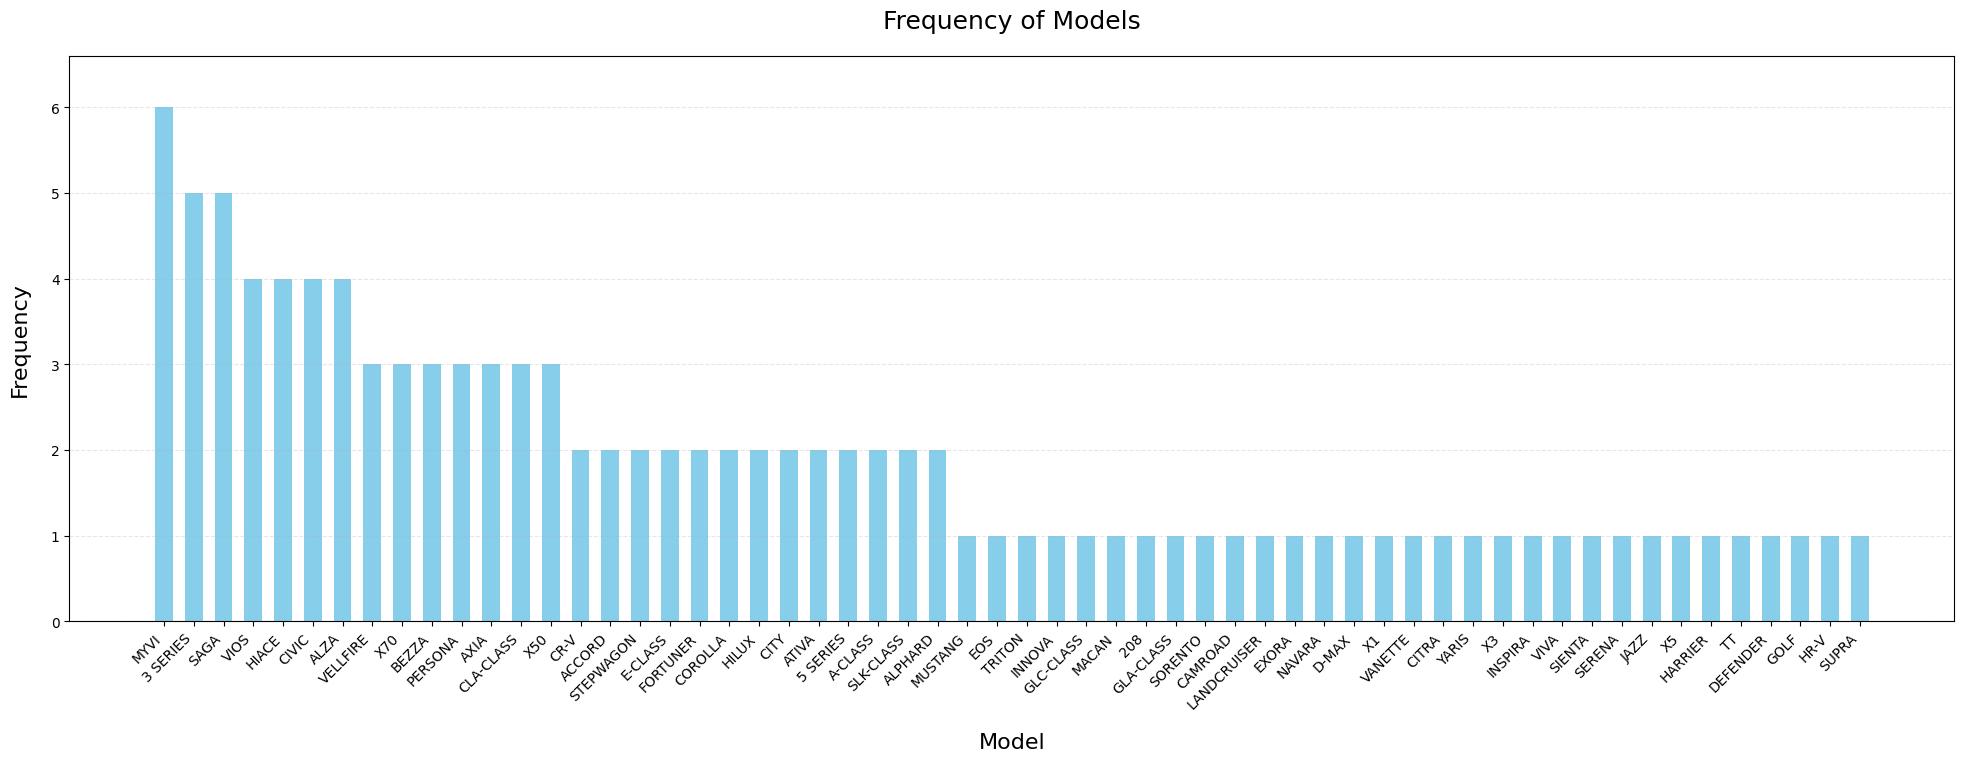

In [ ]:
# Compute the frequency of each model
Model_counts = mudah_data['Model'].value_counts()

# Create a histogram for the Model column
plt.figure(figsize=(20, 8))  # Increased width, adjusted height
plt.bar(Model_counts.index, Model_counts.values, color='skyblue', width=0.6)

# Customize the plot
plt.title('Frequency of Models', fontsize=18, pad=20)
plt.xlabel('Model', fontsize=16, labelpad=15)
plt.ylabel('Frequency', fontsize=16, labelpad=15)

# Adjust x-axis labels
plt.xticks(rotation=45,
           ha='right',  # Horizontal alignment
           fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')  # Only horizontal grid lines

# Ensure minimum y-axis starts at 0
plt.ylim(0, max(Model_counts.values) * 1.1)  # Add 10% margin at the top

# Adjust layout with more spacing
plt.tight_layout(pad=2.0)
plt.subplots_adjust(bottom=0.2)  # Add more space at the bottom for x-labels

plt.show()

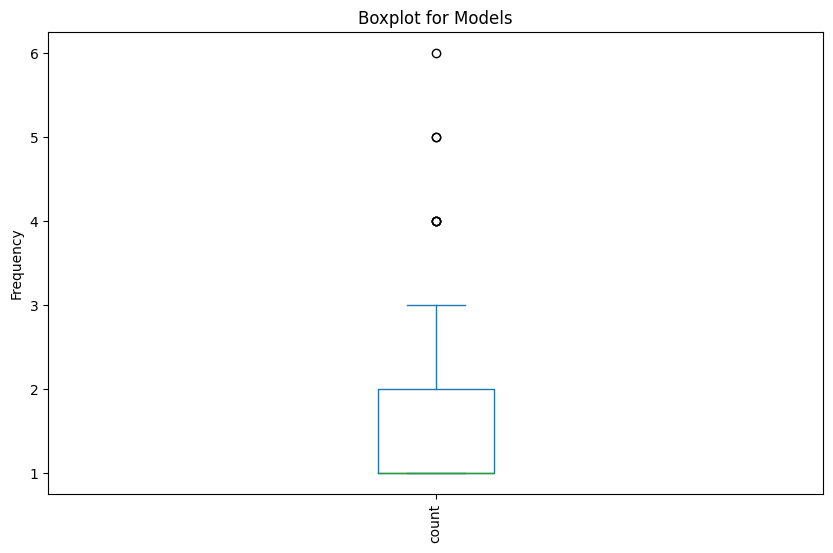

In [ ]:
# Create a boxplot for the 'Model' column
plt.figure(figsize=(10, 6))
Model_counts.plot(kind='box')
plt.title('Boxplot for Models')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

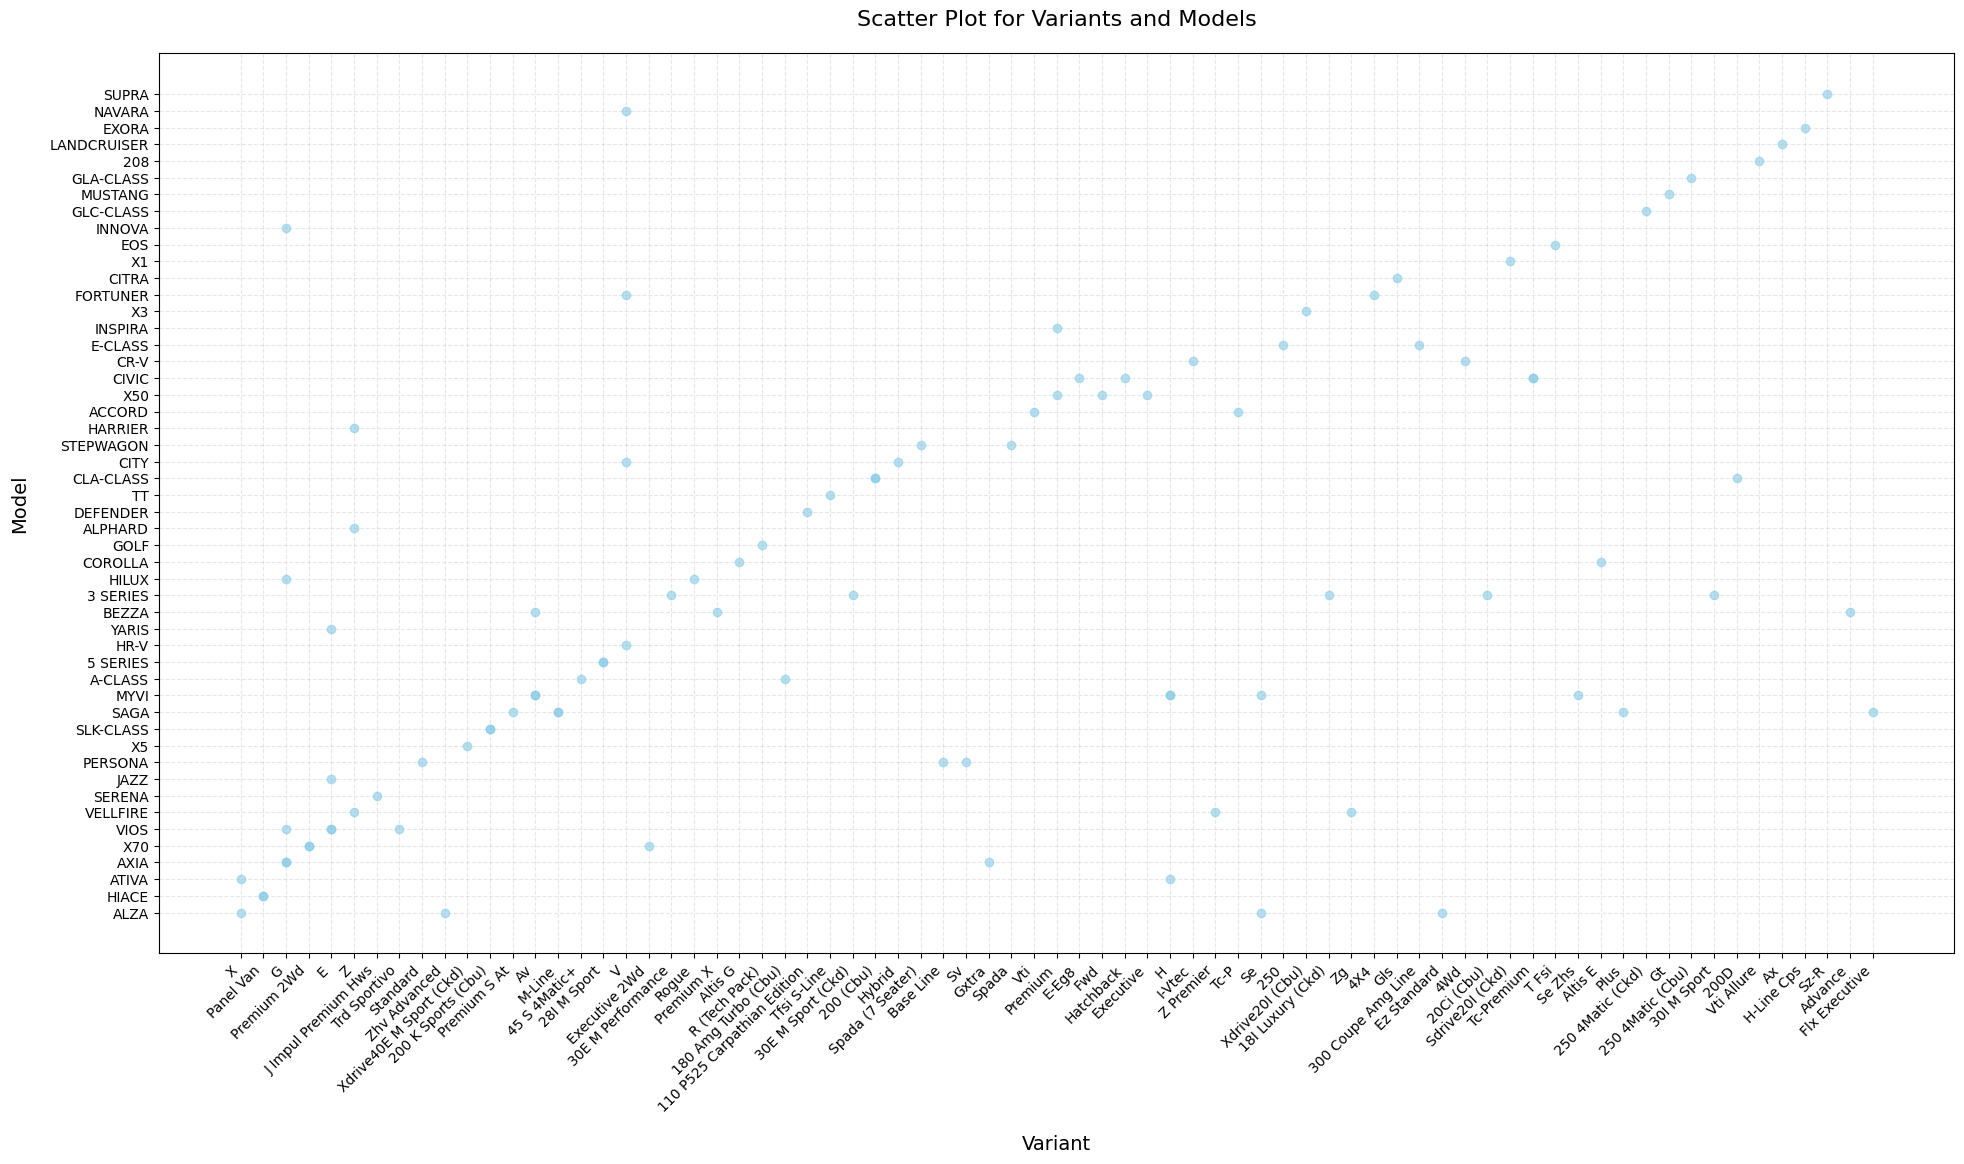

In [ ]:
# Remove rows with missing values in 'Variant' or 'Model'
mudah_data = mudah_data.dropna(subset=['Variant', 'Model'])

# Create numeric mappings for Variant and Model
variant_mapping = {variant: idx for idx, variant in enumerate(mudah_data['Variant'].unique())}
model_mapping = {model: idx for idx, model in enumerate(mudah_data['Model'].unique())}

# Convert categories to numbers for plotting
x_numeric = mudah_data['Variant'].map(variant_mapping)
y_numeric = mudah_data['Model'].map(model_mapping)

# Create a scatter plot with numeric values
plt.figure(figsize=(20, 12))  # Increased figure size
plt.scatter(x_numeric, y_numeric, color='skyblue', alpha=0.6)

# Customize the plot
plt.title('Scatter Plot for Variants and Models', fontsize=16, pad=20)  # Added padding to title
plt.xlabel('Variant', fontsize=14, labelpad=15)  # Added padding to xlabel
plt.ylabel('Model', fontsize=14, labelpad=15)

# Set the tick labels to original categories
plt.xticks(range(len(variant_mapping)),
          list(variant_mapping.keys()),
          rotation=45,
          ha='right',
          fontsize=10)
plt.yticks(range(len(model_mapping)),
          list(model_mapping.keys()),
          fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

**DATA NAME AND PRICE**

In [ ]:
# Clean the Price column (ensure numeric values only)
df["Price"] = df["Price"].apply(lambda x: re.sub(r"[^\d]", "", x))  # Remove non-numeric characters
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")  # Convert to numeric

# Drop rows with NaN in the Price column
df = df.dropna(subset=["Price"])

# Create the histogram for the Price column
plt.figure(figsize=(12, 8))
plt.hist(df["Price"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Car Prices", fontsize=16)
plt.xlabel("Price (RM)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


TypeError: expected string or bytes-like object, got 'int'

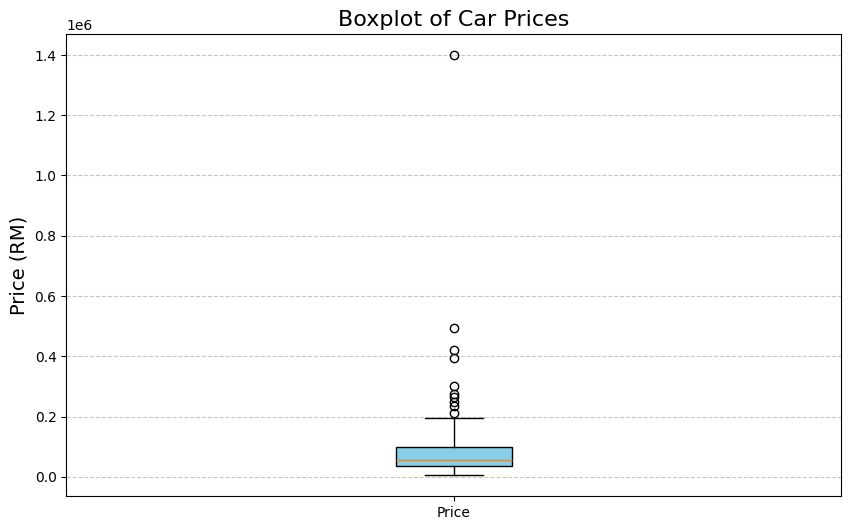

In [ ]:
# Compute the frequency of each car name
CarName_counts = df['Price'].value_counts()

# Create a boxplot for the Price column
plt.figure(figsize=(10, 6))
plt.boxplot(df["Price"], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Boxplot of Car Prices', fontsize=16)
plt.ylabel('Price (RM)', fontsize=14)
plt.xticks([1], ['Price'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


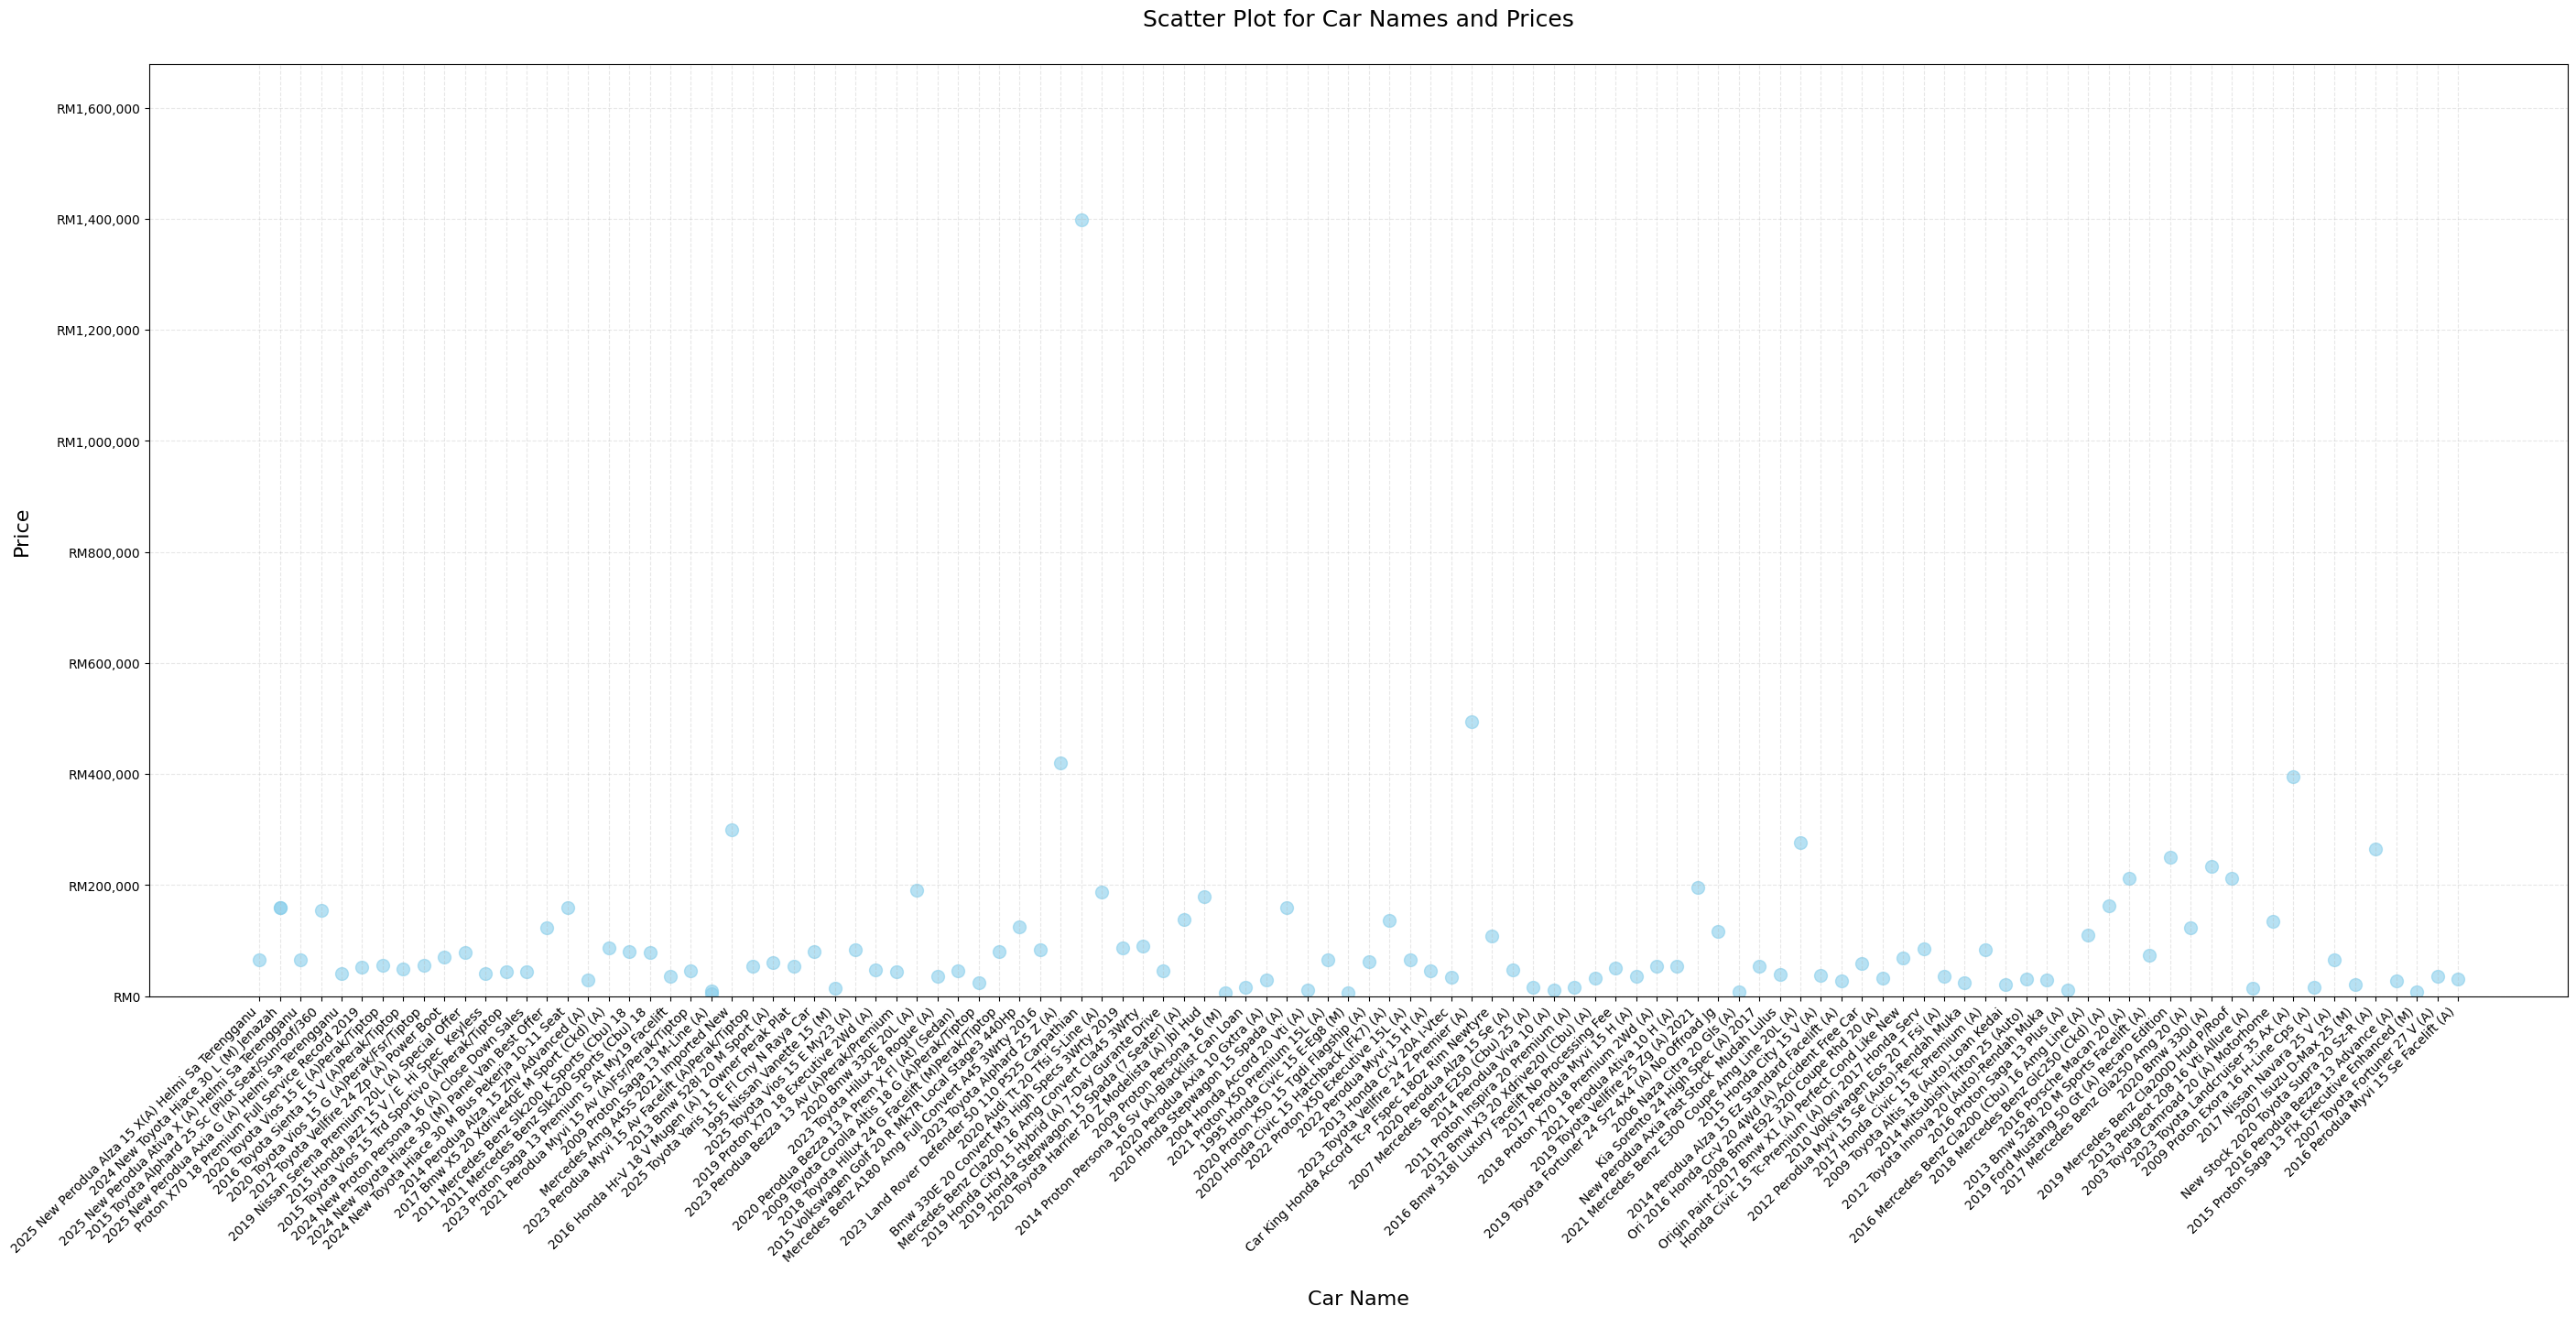

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing values in 'Car Name' or 'Price'
mudah_data = mudah_data.dropna(subset=['Car Name', 'Price'])

# Convert Price to numeric, forcing errors to NaN
mudah_data['Price'] = pd.to_numeric(mudah_data['Price'], errors='coerce')

# Drop rows where Price is NaN
mudah_data = mudah_data.dropna(subset=['Price'])

# Create numeric mapping for Car Names
car_name_mapping = {name: idx for idx, name in enumerate(mudah_data['Car Name'].unique())}

# Convert car names to numbers for plotting
x_numeric = mudah_data['Car Name'].map(car_name_mapping)

# Create a scatter plot with numeric values
plt.figure(figsize=(30, 16))  # Increased width
plt.scatter(x_numeric, mudah_data['Price'], color='skyblue', alpha=0.6, s=100)

# Customize the plot
plt.title('Scatter Plot for Car Names and Prices', fontsize=18, pad=30)
plt.xlabel('Car Name', fontsize=16, labelpad=20)
plt.ylabel('Price', fontsize=16, labelpad=20)

# Set the tick labels to original categories
plt.xticks(range(len(car_name_mapping)),
          list(car_name_mapping.keys()),
          rotation=45,
          ha='right',
          fontsize=10)

# Add padding to axes limits but keep minimum at 0
y_min = 0  # Set minimum to 0 instead of using data minimum
y_max = mudah_data['Price'].max()
y_margin = y_max * 0.2 if y_max > 0 else 0  # Ensure margin is valid
plt.ylim(y_min, y_max + y_margin)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Format y-axis to show prices better
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'RM{x:,.0f}'))

# Adjust layout with more spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.3, right=0.95)  # Increased bottom margin and adjusted right margin

plt.show()

# # Remove rows with missing values in 'Car Name' or 'Price'
# mudah_data = mudah_data.dropna(subset=['Car Name', 'Price'])

# # Create a scatter plot for the 'Car Name' and 'Price' columns
# plt.figure(figsize=(10, 6))
# plt.scatter(mudah_data['Car Name'], mudah_data['Price'], color='skyblue')
# plt.title('Scatter Plot for Car Names and Prices', fontsize=16)
# plt.xlabel('Car Name', fontsize=14)
# plt.ylabel('Price', fontsize=14)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.tight_layout()
# plt.show()


**DATA FUEL TYPE AND SEATS**

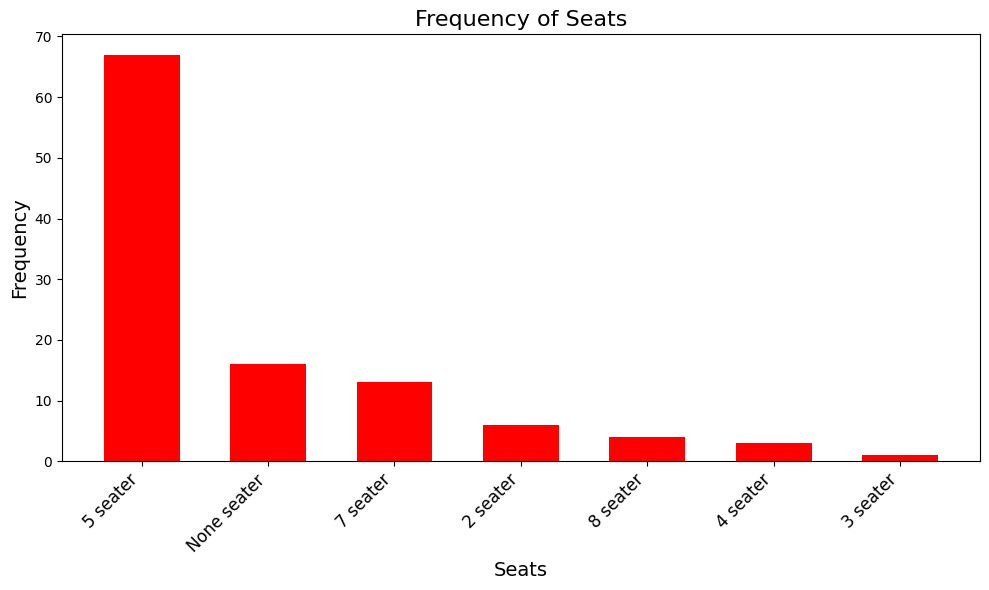

In [ ]:
# Compute the frequency of each Seats
Model_counts = mudah_data['Seats'].value_counts()

# Create a histogram for the Seats column
plt.figure(figsize=(10, 6))
plt.bar(Model_counts.index, Model_counts.values, color='red', width=0.6)
plt.title('Frequency of Seats', fontsize=16)
plt.xlabel('Seats', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

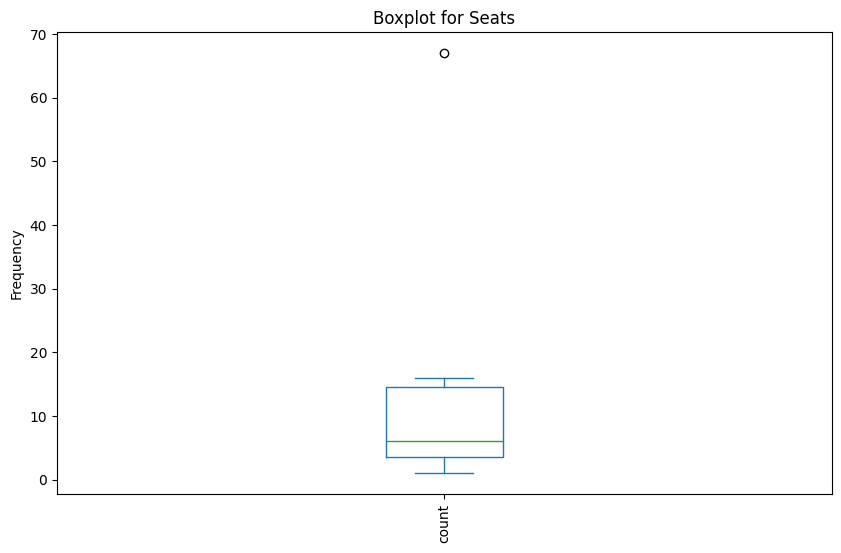

In [ ]:
# Create a boxplot for the 'Seats' column
plt.figure(figsize=(10, 6))
Model_counts.plot(kind='box')
plt.title('Boxplot for Seats')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

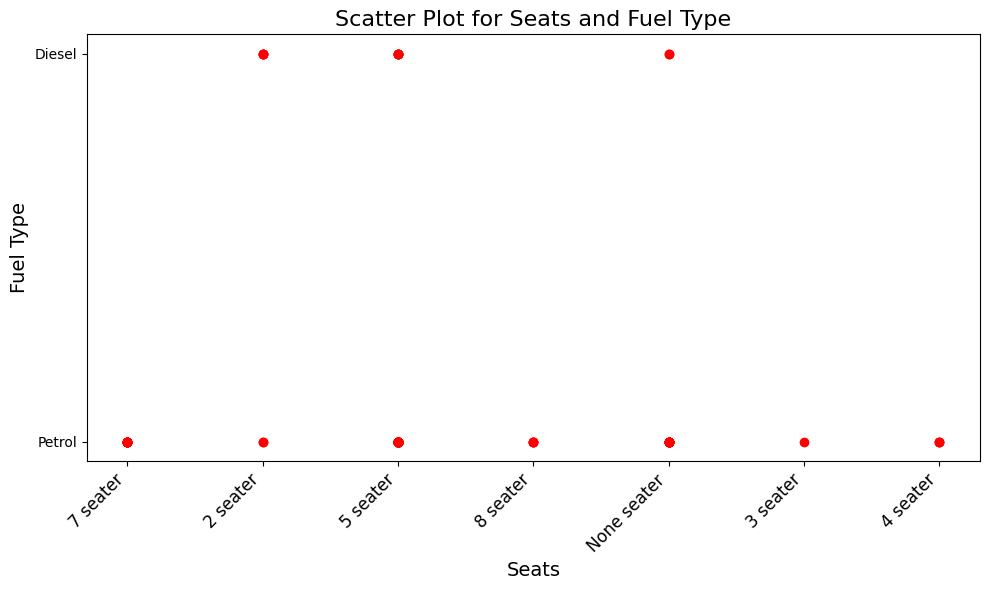

In [ ]:
# Create a scatter plot for the 'Seats' and 'Fuel Type' columns
plt.figure(figsize=(10, 6))
plt.scatter(mudah_data['Seats'], mudah_data['Fuel Type'], color='red')
plt.title('Scatter Plot for Seats and Fuel Type', fontsize=16)
plt.xlabel('Seats', fontsize=14)
plt.ylabel('Fuel Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

**DATA STATE AND CONDITION**

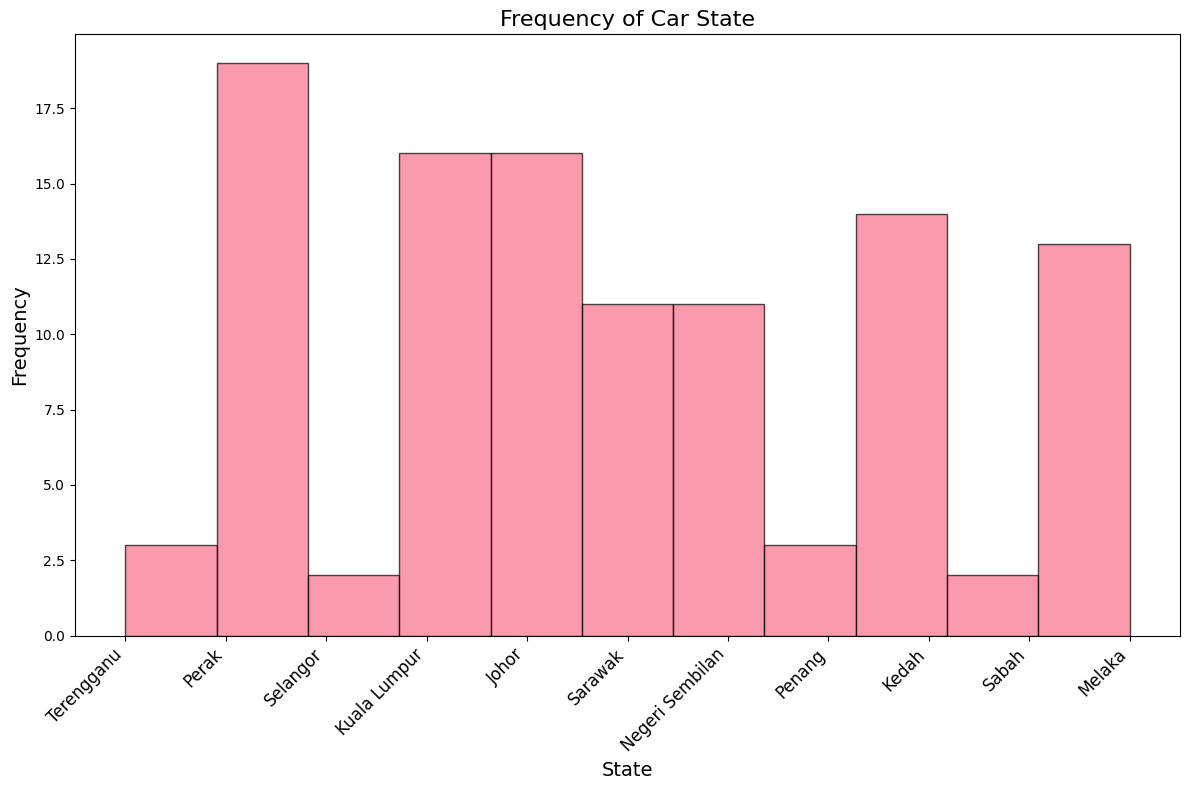

In [ ]:
# Compute the frequency of each car name
StateName_counts = df['State'].value_counts()

# Convert to a list for histogram plotting
data = df['State']

# Set a color palette
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(StateName_counts))

# Create a histogram
plt.hist(data, bins=len(StateName_counts), color=colors[0], edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Frequency of Car State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

<ipython-input-138-077aa421b294>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=StateName_counts.values, palette='husl', width=0.5)


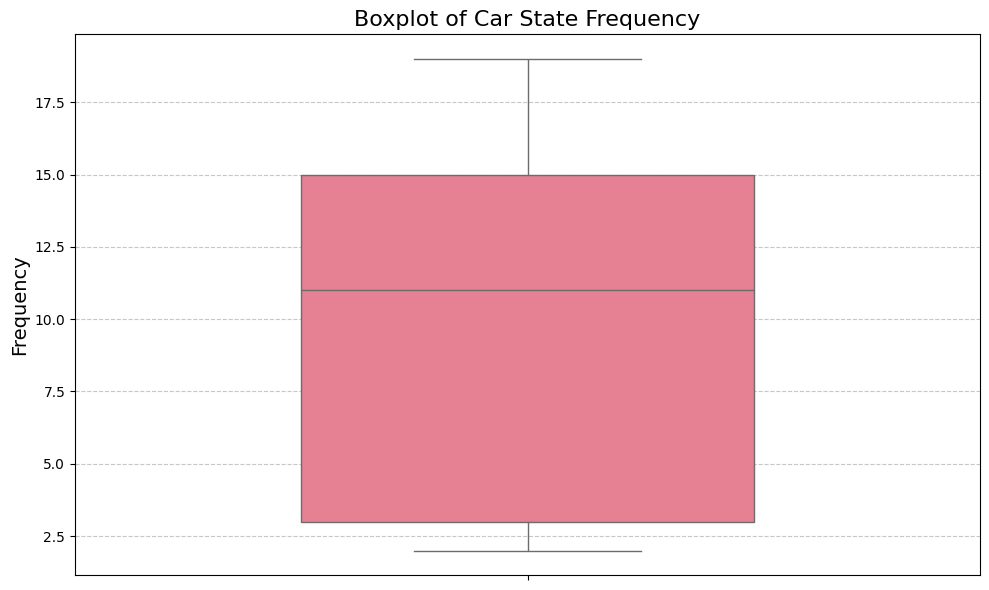

Maximum Frequency: 19 (State: Perak)
Minimum Frequency: 2 (State: Selangor)
IQR: 12.0
Lower Bound: -15.0
Upper Bound: 33.0

No outliers .


In [ ]:
StateName_counts = df['State'].value_counts()

# Compute maximum and minimum frequency
max_freq = StateName_counts.max()
min_freq = StateName_counts.min()
most_common_state = StateName_counts.idxmax()
least_common_state = StateName_counts.idxmin()

# Calculate Interquartile Range (IQR) for outlier detection
Q1 = StateName_counts.quantile(0.25)
Q3 = StateName_counts.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = StateName_counts[(StateName_counts < lower_bound) | (StateName_counts > upper_bound)]

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=StateName_counts.values, palette='husl', width=0.5)
plt.title('Boxplot of Car State Frequency', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display results
print(f"Maximum Frequency: {max_freq} (State: {most_common_state})")
print(f"Minimum Frequency: {min_freq} (State: {least_common_state})")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

if not outliers.empty:
    print("\nOutliers :")
    for state, freq in outliers.items():
        print(f"State: {state}, Frequency: {freq}")
else:
    print("\nNo outliers .")

Reason of Outliers :  <br>

1 ) The first reason is because **Kuala Lumpur is capital city** of Malaysia and the **population** there is quite **high** amongs others state. That why the Kuala lumpur has more data points because of its dense population, economic activity and it one of the factor why citizen living there sold / buy the car the highest.

<br>

2 ) **Data collection bias** , amongs the **40 data** have me scrape, i mostly scrape the data from State like **Kuala Lumpur and Perak** where this both shown a significance data bar. This is the proof why my **data is bias** one .

<br>

3 ) **Platform usage** , Certain states might have a greater number of users on the platform or source where the data was scraped. While Mudah.com is popular amongs Kuala Lumpur Citizen it also be one of the factors. Compared to others state, where only a few cars listed.




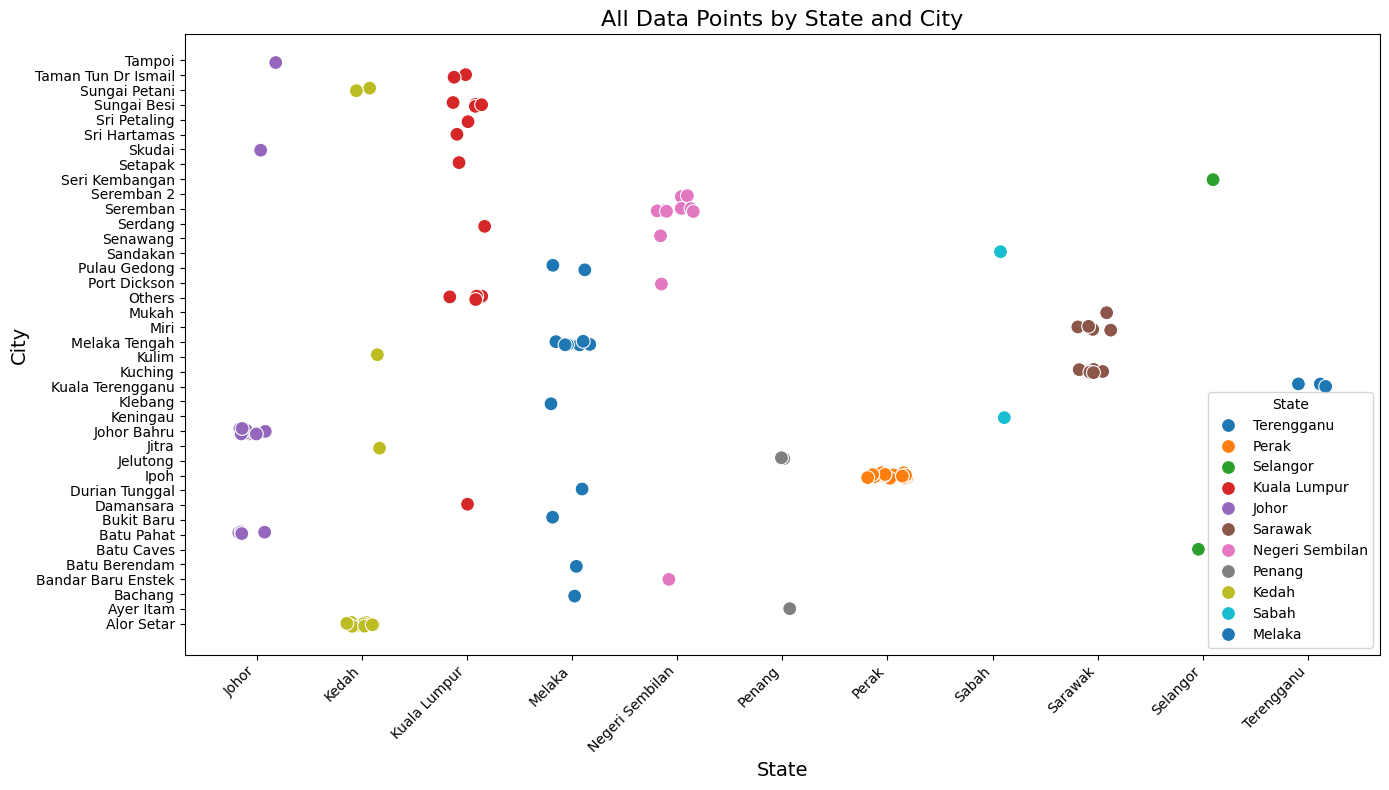

In [ ]:
# Load the dataset
df = pd.read_csv('mudah_scraped_data_cleaned.csv')

# Add jitter to prevent overlapping points
df['State_jitter'] = pd.Categorical(df['State']).codes + np.random.uniform(-0.2, 0.2, size=len(df))
df['City_jitter'] = pd.Categorical(df['City']).codes + np.random.uniform(-0.2, 0.2, size=len(df))

# Create a mapping for original labels
state_labels = pd.Categorical(df['State']).categories
city_labels = pd.Categorical(df['City']).categories

# Scatter plot for State vs. City
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='State_jitter',  # Jittered state
    y='City_jitter',  # Jittered city
    hue='State',  # Different colors for each state
    palette='tab10',
    s=100
)
plt.title('All Data Points by State and City', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('City', fontsize=14)

# Adjust x and y ticks to display original labels
plt.xticks(
    ticks=range(len(state_labels)),
    labels=state_labels,
    rotation=45, ha='right', fontsize=10
)
plt.yticks(
    ticks=range(len(city_labels)),
    labels=city_labels,
    fontsize=10
)

plt.tight_layout()
# plt.legend(title='State', fontsize=10)
plt.show()

**The presence of outliers for each cluster (state) in the plot can be explained as follows:**  <br>

1 ) **Data Distribution:** <br>
Outliers occur because some cities within a state might have significantly different characteristics or fewer data points compared to others. For example, a small or less populated city may show distinct behaviors in data such as car ownership, sales or other attributes.

<br>

2 ) **Small Data Points:** <br>
Cities with fewer data may look like outliers because they don't match the trend of the rest of the state.

<br>

3 ) **Data Issues:** <br>
Errors or missing data could cause certain cities to appear far from their group.

<br>

**From The Graph above, we can conclude:**

1) For state like Johor , Kelantan , Negeri Sembilan , Pahang , we cannot measure the outliers within their own cluster ( state ) this is because due to smaller data points

2) For Kuala Lumpur we can coclude that trend of selling car is at the cities like Sungai Besi , while sri hartamas consider outliers . For the "others"  option we cannot compare , this is because due to no info on the data wee scrape

3) For State like Perak , we can conclude the trend of selling car is among the Ipoh cities , whhile lumut and sitiawan is outliers due the trends is focus on selling car at Ipoh, Perak

4) For Sarawak , we can see the trend sellling car is consistent at Cities
 like Kuching. This due because Kuching is capital cities of Sarawak